# 1a

In [1]:
df <- read.table('fruitflies.txt', header = TRUE)
head(df)

,thorax,longevity,activity
,<dbl>,<int>,<chr>
1,0.64,40,isolated
2,0.70,37,isolated
3,0.72,44,isolated
4,0.72,47,isolated
5,0.72,47,isolated
6,0.76,47,isolated


In [2]:
column_names <- colnames(df)
print(column_names)

[1] "thorax"    "longevity" "activity" 


The dataframe shoes the thorax length, the longivity and the activity levl of each fruitfly. We're now gooing to add the log-longevity to this table. 

In [3]:
# Add the loglongevity column
df$loglongevity <- log(df$longevity)

Now we're gonan provide some visualizations to help understand the relationship between the variables. 

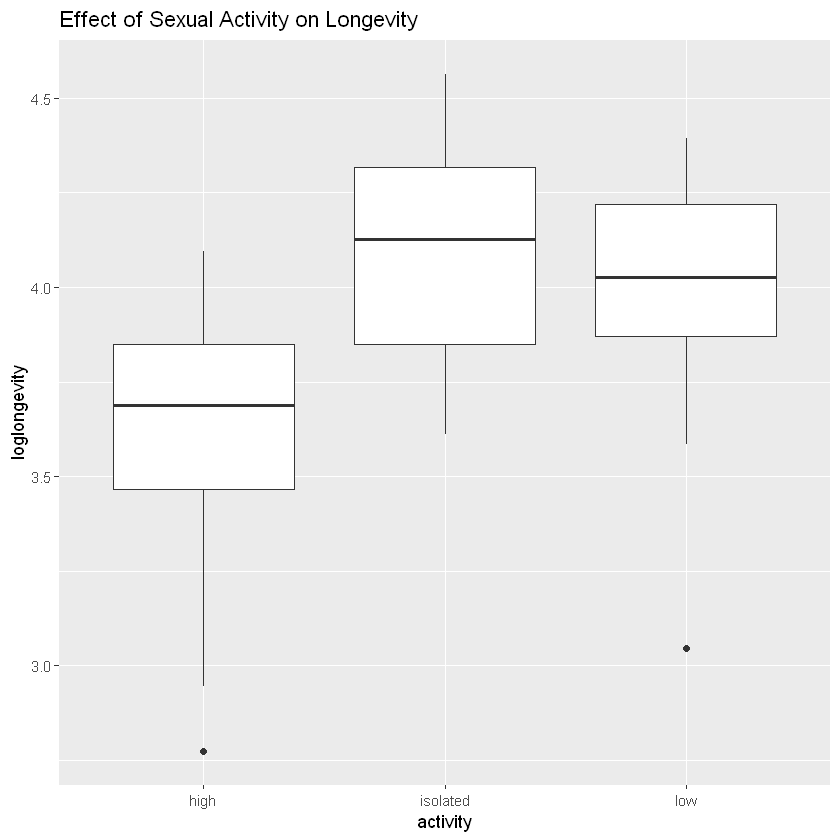

In [4]:
library(ggplot2)
ggplot(df, aes(x = activity, y = loglongevity)) +
  geom_boxplot() +
  labs(title = 'Effect of Sexual Activity on Longevity')

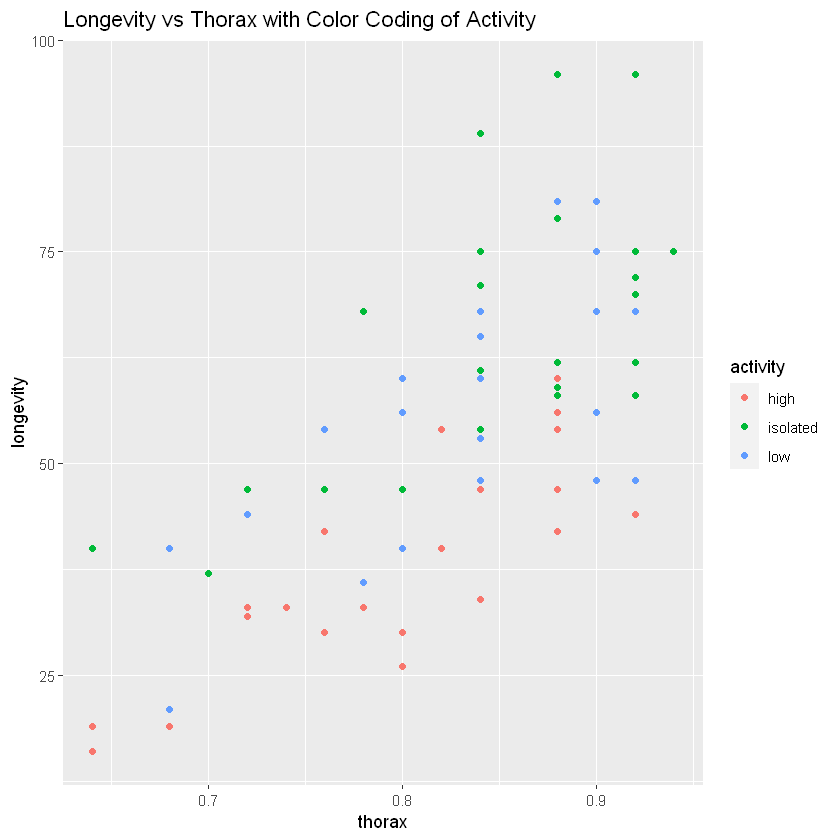

In [5]:
ggplot(df, aes(x = thorax, y = longevity, color = activity)) +
  geom_point() +
  labs(title = 'Longevity vs Thorax with Color Coding of Activity')

In [6]:
# Statistical test - ANOVA
anova_result <- aov(longevity ~ activity, data = df)
summary(anova_result)

            Df Sum Sq Mean Sq F value   Pr(>F)    
activity     2   8239    4120   19.31 1.93e-07 ***
Residuals   72  15360     213                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Looking at the results of the anova test it is possible to conclude that tehre is significant difference between the longevity of different groups taken into account their activity level.

In [7]:
estimated_longevity <- tapply(df$longevity, df$activity, mean)
print(estimated_longevity)

    high isolated      low 
   38.72    63.56    56.76 


The estimated longevity is calculated by taking the sample mean of eeach logevity group. 

# 1b

In [8]:
ancova_model <- lm(longevity ~ activity + thorax, data = df)
summary(ancova_model)


Call:
lm(formula = longevity ~ activity + thorax, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.688  -8.622  -1.176   6.790  26.605 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -67.375     12.750  -5.284 1.33e-06 ***
activityisolated   20.066      2.994   6.701 4.13e-09 ***
activitylow        13.054      2.999   4.352 4.43e-05 ***
thorax            132.618     15.725   8.434 2.62e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.4 on 71 degrees of freedom
Multiple R-squared:  0.6749,	Adjusted R-squared:  0.6611 
F-statistic: 49.12 on 3 and 71 DF,  p-value: < 2.2e-16


The positive coefficient for 'thorax' suggests that, flies with longer thorax lengths tend to have higher estimated longevities. The same can be said for the other activity levels of the animals. 

In [9]:
average_thorax <- mean(df$thorax)

predictions <- data.frame(activity = unique(df$activity), thorax = average_thorax)

predicted_longevity <- predict(ancova_model, newdata = predictions)
print(predicted_longevity)

       1        2        3 
62.03931 55.02712 41.97357 


The result shows varying in longevity given the average thorax for different activity groups

# 1c


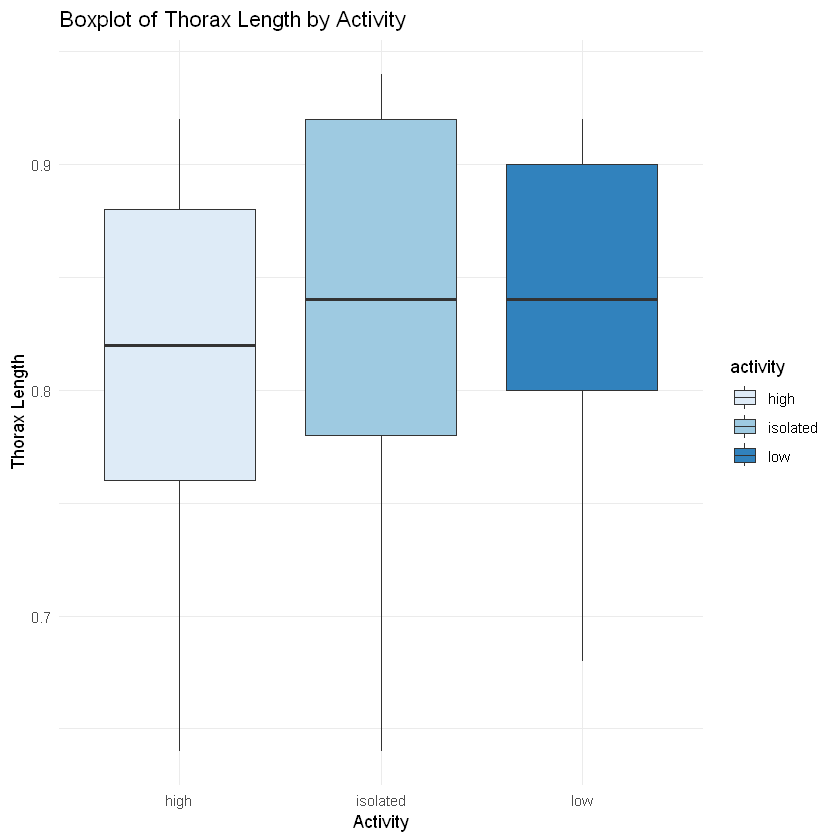

In [10]:
ggplot(df, aes(x = activity, y = thorax, fill = activity)) +
    geom_boxplot() +
    labs(title = 'Boxplot of Thorax Length by Activity',
         x = 'Activity',
         y = 'Thorax Length') +
    theme_minimal() +
    scale_fill_brewer(palette = "Blues") 


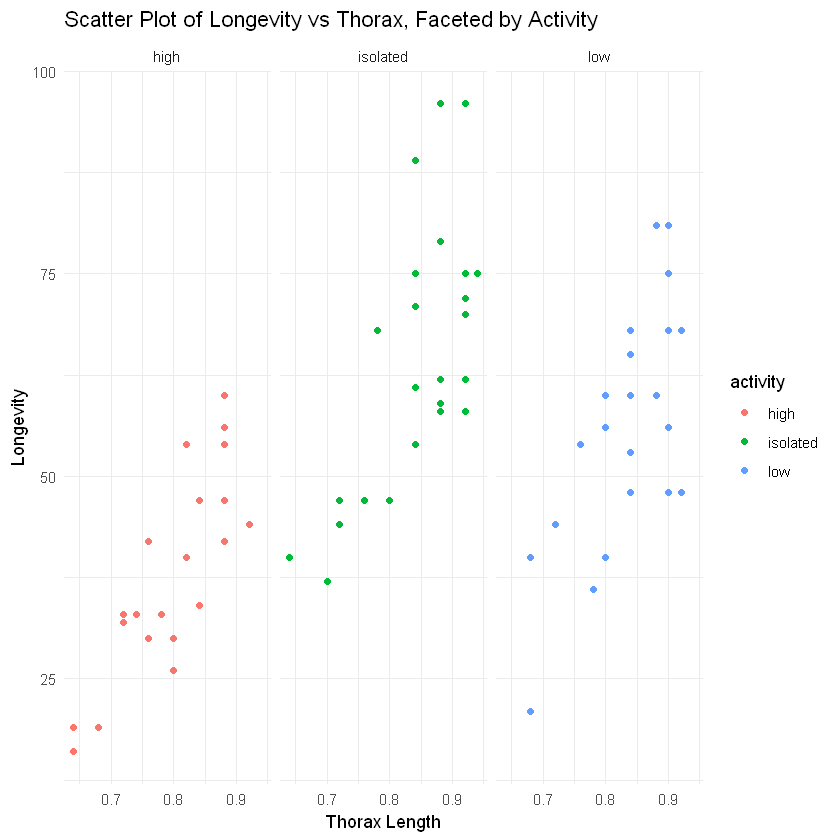

In [11]:
ggplot(df, aes(x = thorax, y = longevity, color = activity)) +
  geom_point() +
  facet_wrap(~activity) +
  labs(title = 'Scatter Plot of Longevity vs Thorax, Faceted by Activity',
       x = 'Thorax Length',
       y = 'Longevity') +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"The following aesthetics were dropped during statistical transformation: colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?"


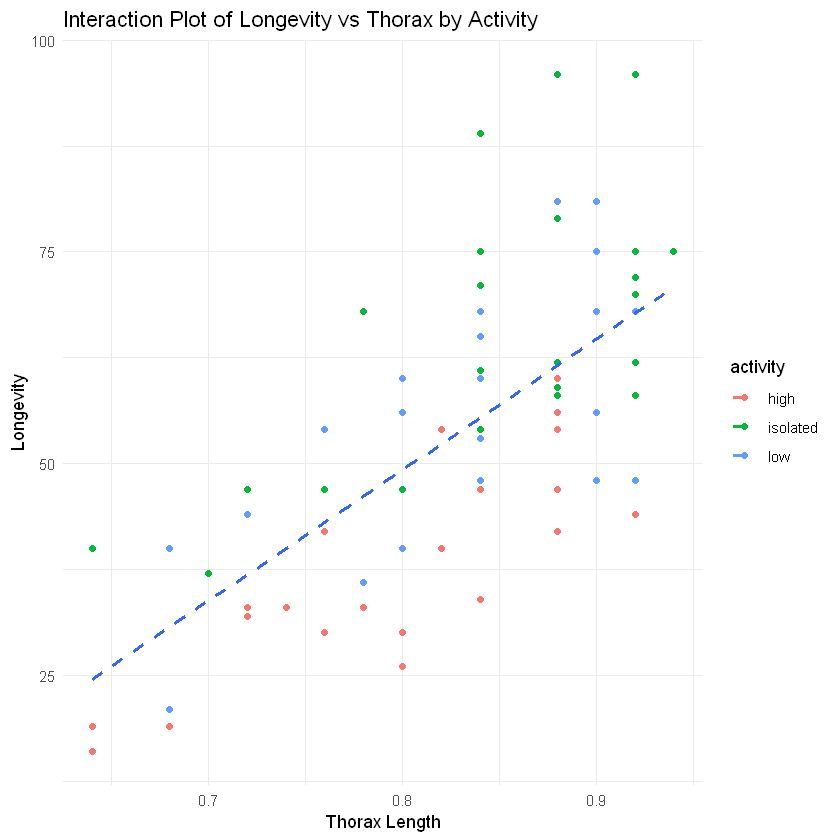

In [12]:
ggplot(df, aes(x = thorax, y = longevity, color = activity)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, linetype = "dashed", aes(group = 1)) +
  labs(title = 'Interaction Plot of Longevity vs Thorax by Activity',
       x = 'Thorax Length',
       y = 'Longevity') +
  theme_minimal()

In [13]:
interaction_model <- lm(longevity ~ thorax * activity, data = df)

# ANOVA for interaction term
interaction_anova <- anova(interaction_model)
print(interaction_anova)

Analysis of Variance Table

Response: longevity
                Df  Sum Sq Mean Sq F value    Pr(>F)    
thorax           1 10959.3 10959.3 98.7184 6.083e-15 ***
activity         2  4966.7  2483.4 22.3696 3.246e-08 ***
thorax:activity  2    12.9     6.5  0.0583    0.9435    
Residuals       69  7660.1   111.0                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Given a p value of 0.9435 it is likely that there is no significant interaction effect between thorax length and activity level in predicting longevity.

# 1d

First we're gonna look at correlation between thorax and longevity. 

In [14]:
overall_corr <- cor(df$thorax, df$longevity)

cat("Overall Correlation:", overall_corr, "\n\n")


Overall Correlation: 0.6814655 



Secondly I'm gonna fit a linear model that includes an interaction term between length and activity group. A significant p-value indicates that the influence of thorax length on longevity differs across the treatment groups.

In [15]:
model <- lm(loglongevity ~ activity * thorax, data = df) 
summary(model)


Call:
lm(formula = loglongevity ~ activity * thorax, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.49803 -0.15920 -0.00031  0.14624  0.35984 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)               0.5978     0.4192   1.426   0.1584    
activityisolated          1.5465     0.5845   2.646   0.0101 *  
activitylow               0.9717     0.6423   1.513   0.1349    
thorax                    3.7554     0.5216   7.199 5.78e-10 ***
activityisolated:thorax  -1.3929     0.7122  -1.956   0.0545 .  
activitylow:thorax       -0.8539     0.7794  -1.096   0.2771    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2001 on 69 degrees of freedom
Multiple R-squared:  0.7359,	Adjusted R-squared:  0.7167 
F-statistic: 38.44 on 5 and 69 DF,  p-value: < 2.2e-16


In conclusion i believe that due to its expleantory power the thorax variable should be kept for the analysis. 

# 1e

In [16]:
ancova_model_days <- lm(longevity ~ activity + thorax, data = df)

summary(ancova_model_days)


Call:
lm(formula = longevity ~ activity + thorax, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.688  -8.622  -1.176   6.790  26.605 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -67.375     12.750  -5.284 1.33e-06 ***
activityisolated   20.066      2.994   6.701 4.13e-09 ***
activitylow        13.054      2.999   4.352 4.43e-05 ***
thorax            132.618     15.725   8.434 2.62e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.4 on 71 degrees of freedom
Multiple R-squared:  0.6749,	Adjusted R-squared:  0.6611 
F-statistic: 49.12 on 3 and 71 DF,  p-value: < 2.2e-16


In [17]:
ancova_model_log <- lm(loglongevity ~ activity + thorax, data = df)

summary(ancova_model_log)


Call:
lm(formula = loglongevity ~ activity + thorax, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4858 -0.1612  0.0104  0.1510  0.3574 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1.21893    0.24865   4.902 5.79e-06 ***
activityisolated  0.40998    0.05839   7.021 1.07e-09 ***
activitylow       0.28570    0.05849   4.885 6.18e-06 ***
thorax            2.97899    0.30665   9.715 1.14e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2027 on 71 degrees of freedom
Multiple R-squared:  0.7211,	Adjusted R-squared:  0.7093 
F-statistic:  61.2 on 3 and 71 DF,  p-value: < 2.2e-16


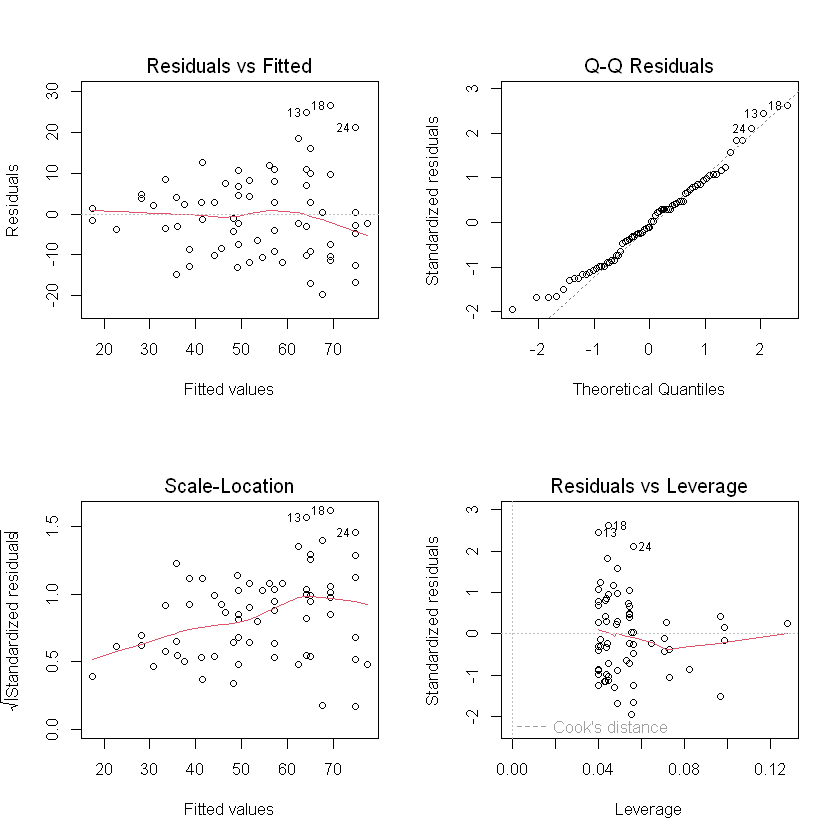

In [18]:
#checking the residuals of the two models
par(mfrow = c(2, 2))
plot(ancova_model_days)

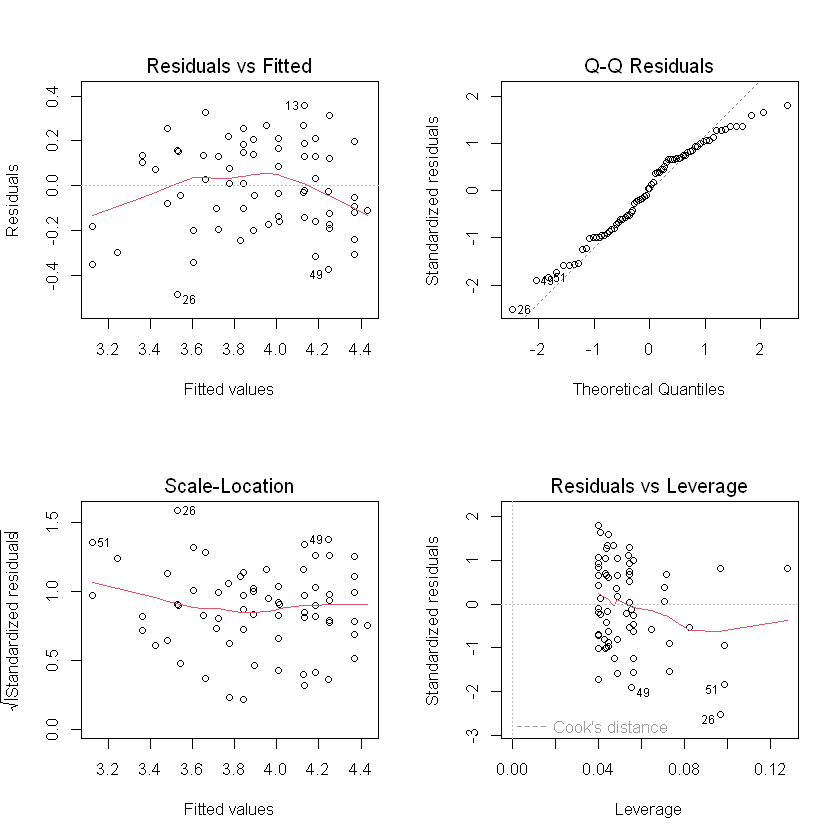

In [19]:

par(mfrow = c(2, 2))
plot(ancova_model_log)

It is best to use the log of a variable given:

Unequal variance: When the data shows uneven spread (heteroscedasticity) across different values of the predictor variables (like activity group), using the log can help stabilize the variance and make the analysis more reliable.

Non-normal residuals: If the leftovers (residuals) from the model don't follow a regular bell-shaped curve (normal distribution), using the log can sometimes make them more normal, which is a common assumption for many statistical models.

Which model to choose? From the plots above it doesn't seem that the non-log version has worse variance or non normal residuals, it is therefore possible to use the non-log version without risks.

# 2a

In [20]:
df <- read.csv("BirthWeight.csv")
head(df)

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1360,56,4.55,34,44,0,20,0,162,57,23,10,35,179,0,0
2,1016,53,4.32,36,40,0,19,0,171,62,19,12,0,183,0,0
3,462,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1
4,1187,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0
5,553,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0
6,1636,51,3.93,38,38,0,29,0,165,61,31,16,0,180,0,0


To analyse the problem of influence points we're going to use Cook's distance. This method spots the influence points in the dataset. 

In [21]:
lm_model <- lm(Birthweight ~ ., data = df)

cooks_distance_values <- cooks.distance(lm_model)
cooks_dist_values <- as.data.frame(cooks_distance_values)

print(cooks_dist_values)

   cooks_distance_values
1           1.222644e-01
2           4.260200e-02
3           4.966930e-02
4           1.879987e-02
5           4.316599e-03
6           2.622484e-02
7           1.833492e-02
8           5.167572e-06
9           1.951297e-02
10          7.166858e-03
11          4.646224e-02
12          1.395631e-02
13          1.101673e-02
14          2.978511e-02
15          4.440778e-02
16          7.292993e-03
17          4.387902e-02
18          6.626507e-05
19          3.253932e-02
20          2.172271e-01
21          3.080121e-04
22          2.996703e-03
23          4.706620e-02
24          1.901290e-01
25          1.618562e-03
26          2.071906e-02
27          1.838801e-02
28          1.719813e-01
29          1.707412e-01
30          6.886398e-04
31          2.310118e-02
32          4.677773e-02
33          1.175976e-02
34          1.355335e-01
35          2.052883e-02
36          4.809845e-02
37          1.048152e-02
38          9.292984e-03
39          7.506931e-02


To check collinearity we can instead use VIF.

In [22]:
install.packages("car")
library(car)

Installing package into 'C:/Users/calcolatore/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'car' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\calcolatore\AppData\Local\Temp\Rtmpii5koa\downloaded_packages


Loading required package: carData



In [23]:
vif(lm_model)

ID    Length  Headcirc Gestation    smoker      mage    mnocig   mheight 
 1.553152  4.762267  1.890961  2.646417  2.822707  9.902228  2.866996  3.354065 
    mppwt      fage    fedyrs    fnocig   fheight    lowbwt    mage35 
 2.532171  6.735061  1.730909  2.035459  1.762959  3.000451  4.344265

We know that values higher than 5 should be cause of concerns, here we can already spot a couple bigger than 5. 

# 2b

In [24]:
summary(lm_model)


Call:
lm(formula = Birthweight ~ ., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.47678 -0.20907 -0.02438  0.20960  0.60017 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -3.830e+00  2.169e+00  -1.766  0.08916 . 
ID          -6.808e-05  1.394e-04  -0.488  0.62931   
Length       5.171e-02  3.888e-02   1.330  0.19503   
Headcirc     8.688e-02  2.997e-02   2.899  0.00751 **
Gestation    9.189e-02  3.219e-02   2.855  0.00834 **
smoker      -2.320e-01  1.738e-01  -1.335  0.19353   
mage         1.746e-02  2.904e-02   0.601  0.55293   
mnocig       2.143e-03  7.078e-03   0.303  0.76442   
mheight      1.366e-03  1.473e-02   0.093  0.92680   
mppwt        9.371e-03  1.156e-02   0.811  0.42498   
fage        -1.079e-02  1.977e-02  -0.546  0.58985   
fedyrs      -3.636e-03  3.185e-02  -0.114  0.90998   
fnocig       2.041e-03  4.311e-03   0.473  0.63991   
fheight     -1.543e-02  9.951e-03  -1.550  0.13317   
lowbwt      -1.612e-02 

The first variable to remove is  lowbwt followed by mheight, fedyrs, mnocig and so on...it seems that there are many variables with significance value higher than 0.05, we're going to use a function to determine the 

In [25]:
backward_elimination <- function(model) {
  while (length(coef(model)) > 1) {
    summary_model <- summary(model)
    max_p_value <- max(summary_model$coefficients[, "Pr(>|t|)"])
    
    if (max_p_value > 0.05) {
      max_p_variable <- rownames(summary_model$coefficients)[which(summary_model$coefficients[, "Pr(>|t|)"] == max_p_value)]
      model_formula <- as.formula(paste(". ~ . -", max_p_variable))
      model <- update(model, formula = model_formula)
    } else {
      break
    }
  }
  return(model)
}

# Example usage
reduced_model <- backward_elimination(lm_model)

In [26]:
reduced_model


Call:
lm(formula = Birthweight ~ Headcirc + Gestation, data = df)

Coefficients:
(Intercept)     Headcirc    Gestation  
    -5.4480       0.1198       0.1178  


# 2c

First we're finding the average value for the predictor variables, then we're predicting the values for the average predictors and extracting confidence intervals. In the second stage insteadwe calculate prediction values with intervals and finally their intervals.

In [29]:
average_values <- data.frame(
  Headcirc = mean(df$Headcirc),
  Gestation = mean(df$Gestation)
)

predicted_values <- predict(reduced_model, newdata = average_values, interval = "confidence", level = 0.95)

confidence_intervals <- predicted_values[, c("fit", "lwr", "upr")]

predicted_values_with_intervals <- predict(reduced_model, newdata = average_values, interval = "prediction", level = 0.95)

prediction_intervals <- predicted_values_with_intervals[, c("fit", "lwr", "upr")]

In [30]:
print(confidence_intervals)
print(prediction_intervals)

     fit      lwr      upr 
3.312857 3.205453 3.420261 
     fit      lwr      upr 
3.312857 2.608563 4.017152 


# 2d

In [32]:
install.packages("glmnet")
install.packages("caret")

library(glmnet)
library(caret)

Installing package into 'C:/Users/calcolatore/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)

also installing the dependencies 'iterators', 'foreach', 'shape'




package 'iterators' successfully unpacked and MD5 sums checked
package 'foreach' successfully unpacked and MD5 sums checked
package 'shape' successfully unpacked and MD5 sums checked
package 'glmnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\calcolatore\AppData\Local\Temp\Rtmpii5koa\downloaded_packages


Installing package into 'C:/Users/calcolatore/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)

also installing the dependencies 'listenv', 'parallelly', 'future', 'globals', 'future.apply', 'progressr', 'SQUAREM', 'diagram', 'lava', 'prodlim', 'proxy', 'clock', 'gower', 'hardhat', 'ipred', 'timeDate', 'e1071', 'ModelMetrics', 'plyr', 'pROC', 'recipes', 'reshape2'





  There is a binary version available but the source version is later:
           binary source needs_compilation
parallelly 1.37.0 1.37.1              TRUE

  Binaries will be installed
package 'listenv' successfully unpacked and MD5 sums checked
package 'parallelly' successfully unpacked and MD5 sums checked
package 'future' successfully unpacked and MD5 sums checked
package 'globals' successfully unpacked and MD5 sums checked
package 'future.apply' successfully unpacked and MD5 sums checked
package 'progressr' successfully unpacked and MD5 sums checked
package 'SQUAREM' successfully unpacked and MD5 sums checked
package 'diagram' successfully unpacked and MD5 sums checked
package 'lava' successfully unpacked and MD5 sums checked
package 'prodlim' successfully unpacked and MD5 sums checked
package 'proxy' successfully unpacked and MD5 sums checked
package 'clock' successfully unpacked and MD5 sums checked
package 'gower' successfully unpacked and MD5 sums checked
package 'hardhat' s

Loading required package: Matrix

Loaded glmnet 4.1-8

Loading required package: lattice



In [40]:
column_to_exclude <- "Birthweight"  
columns_to_include <- setdiff(names(df), column_to_exclude)

x <- as.matrix(df[, columns_to_include])
y <- df$Birthweight

lasso_model <- cv.glmnet(x, y, alpha = 1)

In [41]:
coefficients_lm <- coef(reduced_model)
coefficients_lasso <- as.matrix(coef(lasso_model, s = "lambda.min"))

print("Linear Regression Coefficients:")
print(coefficients_lm)

print("LASSO Coefficients:")
print(coefficients_lasso)

[1] "Linear Regression Coefficients:"
(Intercept)    Headcirc   Gestation 
 -5.4479942   0.1197669   0.1178217 
[1] "LASSO Coefficients:"
                      s1
(Intercept) -3.856312202
ID           0.000000000
Length       0.034506533
Headcirc     0.077275918
Gestation    0.066522674
smoker      -0.093882135
mage         0.000000000
mnocig       0.000000000
mheight      0.000000000
mppwt        0.003473861
fage         0.000000000
fedyrs       0.000000000
fnocig       0.000000000
fheight      0.000000000
lowbwt      -0.178176657
mage35      -0.081027623


In [42]:
lm_predictions <- predict(reduced_model, newdata = df)
lasso_predictions <- predict(lasso_model, newx = x, s = "lambda.min")

rmse_lm <- sqrt(mean((lm_predictions - y)^2))
rmse_lasso <- sqrt(mean((lasso_predictions - y)^2))

print(paste("RMSE - Linear Regression: ", rmse_lm))
print(paste("RMSE - LASSO: ", rmse_lasso))

[1] "RMSE - Linear Regression:  0.331606307516887"
[1] "RMSE - LASSO:  0.299011983051364"


Here the Lasso model seem to be outperforming the model handcrafted in the previous steps.

# 2e

In [43]:
summary_bwt_smoker <- tapply(df$Birthweight, df$smoker, summary)
print(summary_bwt_smoker)

$`0`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.650   3.140   3.385   3.510   3.933   4.550 

$`1`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.920   2.743   3.185   3.134   3.545   4.570 



As it shows non smokers give birth to children with greater weigth at birth.

In [44]:
summary_bwt_age <- tapply(df$Birthweight, df$mage, summary)
print(summary_bwt_age)

$`18`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.63    3.63    3.63    3.63    3.63    3.63 

$`19`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.780   2.840   2.900   3.333   3.610   4.320 

$`20`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.920   2.515   3.420   3.233   3.855   4.550 

$`21`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.740   2.970   3.200   3.197   3.425   3.650 

$`22`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.510   2.667   2.825   2.825   2.982   3.140 

$`23`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.320   3.342   3.365   3.365   3.388   3.410 

$`24`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.650   3.115   3.520   3.408   3.812   3.940 

$`26`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.920   3.072   3.225   3.225   3.377   3.530 

$`27`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.030   3.150   3.255   3.223   3.328   3.350 

$`28`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 


[1] "Correlation between Age and Birthweight: 0"


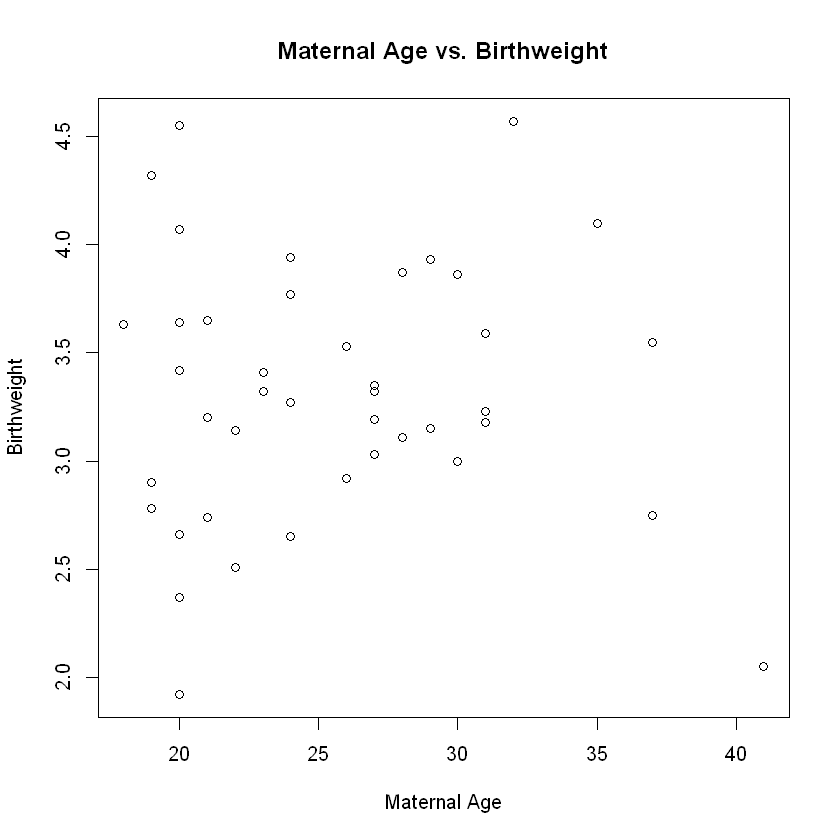

In [45]:
plot(df$mage, df$Birthweight, main = "Maternal Age vs. Birthweight", xlab = "Maternal Age", ylab = "Birthweight")

correlation_age_bwt <- cor(df$mage, df$Birthweight)
print(paste("Correlation between Age and Birthweight:", round(correlation_age_bwt, 3)))

It seems taht there is no correlation between the maternal age and the birthweight. 

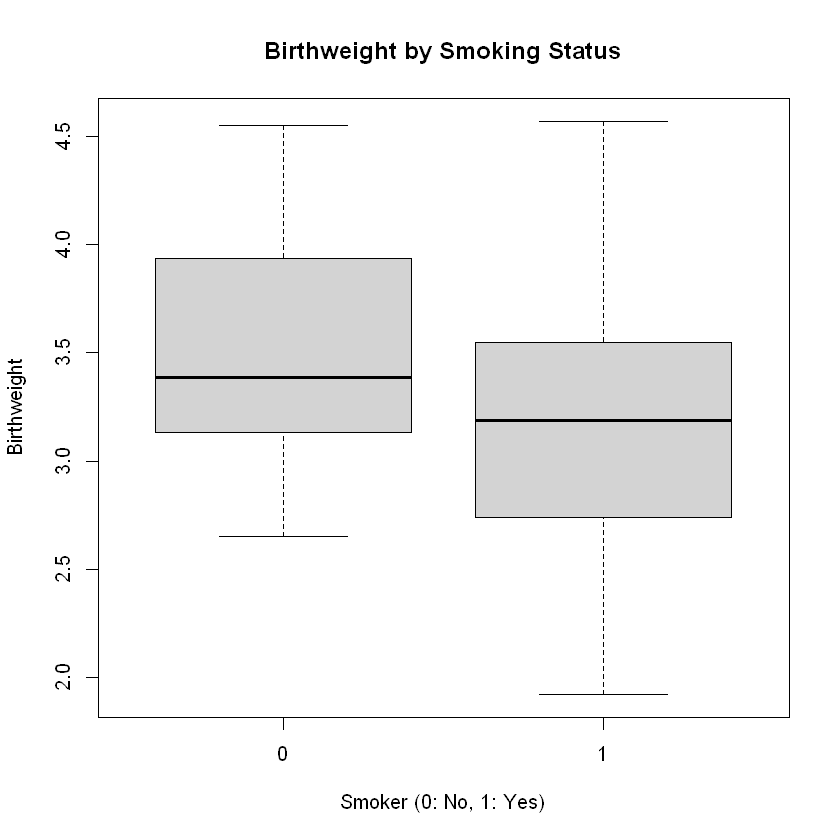

In [46]:
boxplot(Birthweight ~ smoker, data = df, main = "Birthweight by Smoking Status", xlab = "Smoker (0: No, 1: Yes)", ylab = "Birthweight")

# 2f

Here I'm encoding the lowbirthweigth as a binary variable that is 1 when the weigth is below 2.5 and is 0 when the weigth is greater. Thjs is the only way to fit a logistic regression to the otherwise continuous Birthweigth variable. 

In [66]:
logistic_model <- glm(lowbwt ~ ., data = df, family = "binomial")
summary(logistic_model)

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = lowbwt ~ ., family = "binomial", data = df)

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)
(Intercept)       2.039e+02  3.799e+06       0        1
ID               -7.818e-04  2.985e+02       0        1
Length           -9.130e+00  6.066e+04       0        1
Birthweight      -2.939e+01  4.260e+05       0        1
Headcirc          3.690e+00  1.159e+05       0        1
Gestation         1.824e+00  1.077e+05       0        1
smoker            4.366e+00  5.955e+05       0        1
mage             -4.333e+00  3.277e+04       0        1
mnocig           -7.994e-01  1.163e+04       0        1
mheight           5.843e-01  2.215e+04       0        1
mppwt            -6.698e-01  2.067e+04       0        1
fage              7.843e-01  2.760e+04       0        1
fedyrs            2.202e+00  6.276e+04       0        1
fnocig            6.555e-01  1.484e+04       0        1
fheight           6.179e-01  1.752e+04       0        1
mage35            9.380e

In [67]:
odds_ratios <- exp(coef(logistic_model))
odds_ratios

(Intercept)               ID           Length      Birthweight 
    3.424880e+88     9.992185e-01     1.083958e-04     1.717625e-13 
        Headcirc        Gestation           smoker             mage 
    4.005153e+01     6.199562e+00     7.874213e+01     1.313316e-02 
          mnocig          mheight            mppwt             fage 
    4.496042e-01     1.793807e+00     5.117972e-01     2.190774e+00 
          fedyrs           fnocig          fheight           mage35 
    9.039117e+00     1.926043e+00     1.855089e+00     5.442175e+40 
low_birth_weight 
    5.949798e+00

# 2g

In [71]:
install.packages("jtools")
library(jtools)

Installing package into 'C:/Users/calcolatore/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)

also installing the dependency 'pander'




package 'pander' successfully unpacked and MD5 sums checked
package 'jtools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\calcolatore\AppData\Local\Temp\Rtmpii5koa\downloaded_packages


In [72]:
lm_model_interaction_smoker <- lm(Birthweight ~ Gestation * smoker + smoker, data = df)

# Print the summary
summ(lm_model_interaction_smoker)

MODEL INFO:
Observations: 42
Dependent Variable: Birthweight
Type: OLS linear regression 

MODEL FIT:
F(3,38) = 17.45, p = 0.00
R² = 0.58
Adj. R² = 0.55 

Standard errors: OLS
-----------------------------------------------------
                          Est.   S.E.   t val.      p
---------------------- ------- ------ -------- ------
(Intercept)              -1.57   1.32    -1.19   0.24
Gestation                 0.13   0.03     3.86   0.00
smoker                   -2.59   1.90    -1.36   0.18
Gestation:smoker          0.06   0.05     1.21   0.23
-----------------------------------------------------

In [73]:
install.packages("sjPlot") 
library(sjPlot)

Installing package into 'C:/Users/calcolatore/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)

also installing the dependencies 'estimability', 'effectsize', 'emmeans', 'bayestestR', 'datawizard', 'ggeffects', 'insight', 'parameters', 'performance', 'sjlabelled', 'sjmisc', 'sjstats'




package 'estimability' successfully unpacked and MD5 sums checked
package 'effectsize' successfully unpacked and MD5 sums checked
package 'emmeans' successfully unpacked and MD5 sums checked
package 'bayestestR' successfully unpacked and MD5 sums checked
package 'datawizard' successfully unpacked and MD5 sums checked
package 'ggeffects' successfully unpacked and MD5 sums checked
package 'insight' successfully unpacked and MD5 sums checked
package 'parameters' successfully unpacked and MD5 sums checked
package 'performance' successfully unpacked and MD5 sums checked
package 'sjlabelled' successfully unpacked and MD5 sums checked
package 'sjmisc' successfully unpacked and MD5 sums checked
package 'sjstats' successfully unpacked and MD5 sums checked
package 'sjPlot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\calcolatore\AppData\Local\Temp\Rtmpii5koa\downloaded_packages


Registered S3 methods overwritten by 'broom':
  method            from  
  tidy.glht         jtools
  tidy.summary.glht jtools

Install package "strengejacke" from GitHub (`devtools::install_github("strengejacke/strengejacke")`) to load all sj-packages at once!



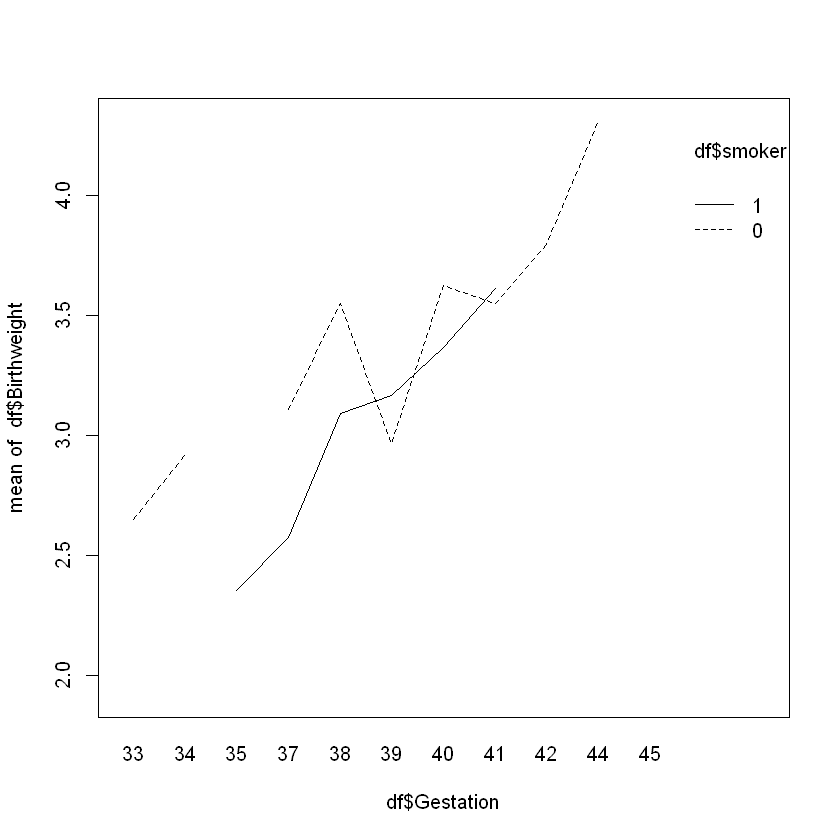

In [77]:
interaction.plot(x.factor = df$Gestation, trace.factor = df$smoker, response = df$Birthweight)

In [78]:
lm_model_interaction_mage35 <- lm(Birthweight ~ Gestation * mage35 + mage35, data = df)

# Print the summary
summ(lm_model_interaction_mage35)

MODEL INFO:
Observations: 42
Dependent Variable: Birthweight
Type: OLS linear regression 

MODEL FIT:
F(3,38) = 14.68, p = 0.00
R² = 0.54
Adj. R² = 0.50 

Standard errors: OLS
-----------------------------------------------------
                          Est.   S.E.   t val.      p
---------------------- ------- ------ -------- ------
(Intercept)              -2.61   1.04    -2.51   0.02
Gestation                 0.15   0.03     5.74   0.00
mage35                   -4.97   3.53    -1.41   0.17
Gestation:mage35          0.12   0.09     1.34   0.19
-----------------------------------------------------

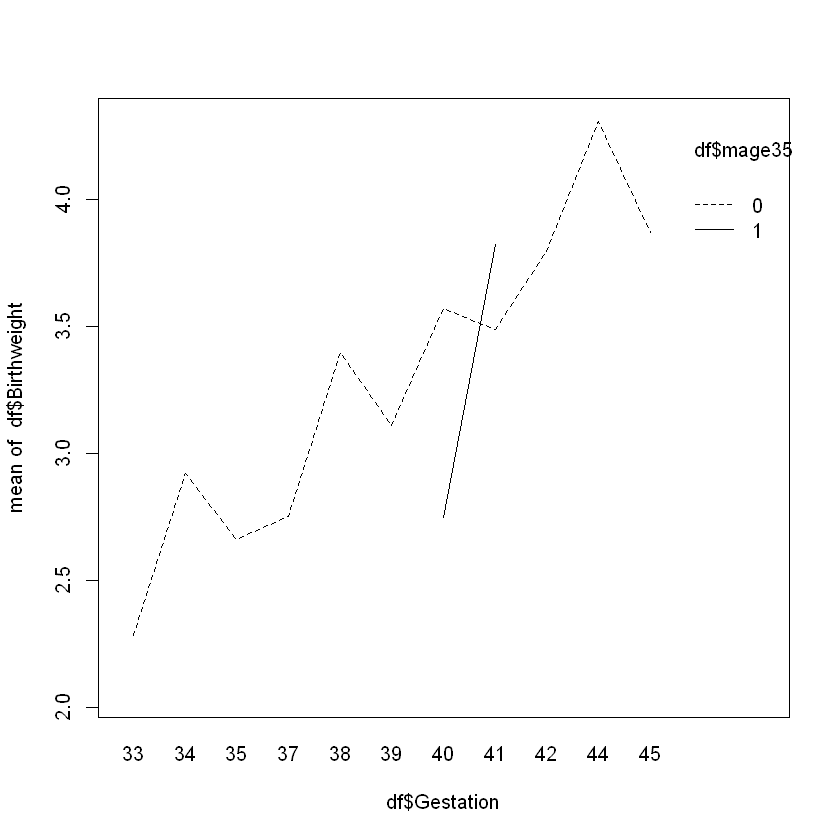

In [79]:
interaction.plot(x.factor = df$Gestation, trace.factor = df$mage35, response = df$Birthweight)

Here I'm gonna choose lm_model_innteraction_smoker because it has a higher R^2 value. 

# 2h

In [83]:
new_data <- expand.grid(Gestation = 40, smoker = c(0, 1), mage35 = c(0, 1))

predicted_birthweights <- predict(lm_model_interaction_smoker, newdata = new_data, type = "response")
result <- cbind(new_data, Predicted_Birthweight = predicted_birthweights)
print(result)

  Gestation smoker mage35 Predicted_Birthweight
1        40      0      0              3.457612
2        40      1      0              3.457612
3        40      0      1              3.316667
4        40      1      1              3.316667


The results are not in the range 0 to 1 which makes us consider the fact that errors were made in the process of finding the probabilities.

# 2i

In [85]:
contingency_table <- table(df$smoker, df$mage35)
chi_squared_result <- chisq.test(contingency_table)


print(chi_squared_result)

Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test with Yates' continuity correction

data:  contingency_table
X-squared = 0.18149, df = 1, p-value = 0.6701



Simplicity: Contingency table tests are relatively simple to implement

Limited Modeling: Contingency table tests provide information about associations between variables but do not directly model the relationship

Assumes Independence: The Chi-squared test assumes independence between the variables,

Modeling Complexity: Logistic regression allows for the modeling of complex relationships

Assumption of Linearity: Logistic regression assumes a linear relationship between the log odds and predictors,

Sensitivity to Outliers: Logistic regression can be sensitive to outliers

# 3a

In [94]:
df <- read.table("awards.txt", header = TRUE)
head(df)

,num_awards,prog,math
,<int>,<int>,<int>
1,1,3,41
2,1,1,41
3,1,3,44
4,1,3,42
5,1,3,40
6,1,1,42


In [98]:

poisson_model <- glm(num_awards ~ prog, data = df, family = "poisson")

summ(poisson_model)

predicted_awards <- predict(poisson_model, type = "response")

result <- data.frame(Program_Type = unique(df$prog), Predicted_Awards = predicted_awards[1:3])

print(result)

MODEL INFO:
Observations: 200
Dependent Variable: num_awards
Type: Generalized linear model
  Family: poisson 
  Link function: log 

MODEL FIT:
χ²(1) = 2.18, p = 0.14
Pseudo-R² (Cragg-Uhler) = 0.01
Pseudo-R² (McFadden) = 0.00
AIC = 520.97, BIC = 527.57 

Standard errors: MLE
------------------------------------------------
                     Est.   S.E.   z val.      p
----------------- ------- ------ -------- ------
(Intercept)         -0.35   0.23    -1.51   0.13
prog                 0.15   0.10     1.47   0.14
------------------------------------------------

  Program_Type Predicted_Awards
1            3        1.1211213
2            1        0.8234681
3            2        1.1211213


# 3b

The Kruskal-Wallis test is a non-parametric test used to determine whether there are statistically significant differences between two or more independent groups. If we want to explore differences in the number of awards among different program types without assuming a specific distribution, we can use the Kruskal-Wallis test.

In [100]:
kruskal_test_result <- kruskal.test(num_awards ~ prog, data = df)

print(kruskal_test_result)


	Kruskal-Wallis rank sum test

data:  num_awards by prog
Kruskal-Wallis chi-squared = 10.755, df = 2, p-value = 0.00462



Given that the p-value is below the significance value of 0.05 we can conclude that there are differences in the number of awrds amongst the different program types. 

# 3c

In [101]:
poisson_model <- glm(num_awards ~ prog * math, data = df, family = "poisson")

summ(poisson_model)

MODEL INFO:
Observations: 200
Dependent Variable: num_awards
Type: Generalized linear model
  Family: poisson 
  Link function: log 

MODEL FIT:
χ²(3) = 30.66, p = 0.00
Pseudo-R² (Cragg-Uhler) = 0.15
Pseudo-R² (McFadden) = 0.06
AIC = 496.49, BIC = 509.69 

Standard errors: MLE
------------------------------------------------
                     Est.   S.E.   z val.      p
----------------- ------- ------ -------- ------
(Intercept)         -4.25   1.72    -2.47   0.01
prog                 0.95   0.74     1.28   0.20
math                 0.07   0.03     2.13   0.03
prog:math           -0.01   0.01    -0.94   0.35
------------------------------------------------

In [104]:
new_data <- expand.grid(prog = unique(df$prog), math = 56)
predicted_awards <- predict(poisson_model, newdata = df, type = "response")

result <- cbind(df, Predicted_Awards = predicted_awards)
print(result)

    num_awards prog math Predicted_Awards
1            1    3   41        0.7998398
2            1    1   41        0.3599807
3            1    3   44        0.8716713
4            1    3   42        0.8231006
5            1    3   40        0.7772364
6            1    1   42        0.3805744
7            1    3   46        0.9231081
8            1    3   40        0.7772364
9            1    3   33        0.6359218
10           1    3   46        0.9231081
11           1    3   40        0.7772364
12           0    2   38        0.4728525
13           1    3   44        0.8716713
14           1    3   37        0.7131869
15           1    3   40        0.7772364
16           1    1   39        0.3220760
17           1    1   43        0.4023462
18           0    3   38        0.7339277
19           1    2   45        0.6351286
20           0    3   39        0.7552717
21           1    1   42        0.3805744
22           1    3   45        0.8970211
23           1    3   40        0.